Introduction: This project analyzes data from the online dating app, OK Cupid.  Online dating has exploded in popularity over the recent years, and many dating apps have been created to help people make good connections with people they may otherwise never have gotten to meet. Sophisticated algorithms are used to make recommendations based on a number of factors, from personal interests to age, height, etc.  These apps provide us with a treasure trove of information from which we make meaningful insights about how people experience romance.

The goal of this portfolio project is to scope, prep, analyze, and create a machine learning model to solve a question.
Datasource: profiles.csv provided by Codecademy.com


Scoping:  I will keep the project contained to four areas. Project goals, to define high-level objectives and set overall intentions of the project. Data, I will keep contained to the provided dataset.  Analysis, which I will have to come up with solutions as I work with the data and stick to my project goals. And evaluation, where I draw conclusions from my findings.

Project goals - Matching astrological signs is a popular method for many online daters.  However, there are a number of profiles that don't list an astrological sign.  This being the case, I am going to see if I can build a machine learning model which predicts astrological signs based on other inputed data so we can make matches with users who put a lot of importance in astrological matches.

Data - I will be using the dataset profiles.csv provided by Codecademy.com which provides some basic details about a user, and self-answered short essay prompts.

Analysis - I will use a combination of descriptive statistics and data visualizations to draw meaningful insights about the data.  And since the goal of this project is to predict astrological signs, I will use supervised machine learning algorithms to implement a predictive model.

Evaluation - The project will conclude with an evaluation of the model with a validation set.  I will display the performance of the predictions using a confusion matrix, and metrics such as accuracy, precision, recall and F1 scores.

In [10]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Now we will check all of the features along with their datatypes, to get an idea of what we should explore further.

In [13]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [14]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [15]:
profiles.count()

age            59946
body_type      54650
diet           35551
drinks         56961
drugs          45866
education      53318
essay0         54458
essay1         52374
essay2         50308
essay3         48470
essay4         49409
essay5         49096
essay6         46175
essay7         47495
essay8         40721
essay9         47343
ethnicity      54266
height         59943
income         59946
job            51748
last_online    59946
location       59946
offspring      24385
orientation    59946
pets           40025
religion       39720
sex            59946
sign           48890
smokes         54434
speaks         59896
status         59946
dtype: int64

There are 59,946 rows of entries in this dataset, with 31 features.  10 features are short form answers, ie 'essay0'. The rest are personal details, like age, sex, and body_type.  48,890 have a zodiac sign listed, which means 11,056 have left the zodiac sign blank.  We should be able to build a machine learning model off of the majority of rows in order to predict the missing zodiac signs.

In [17]:
print('number of categories: ', profiles.sign.nunique())
print('categories: ', profiles.sign.unique())

number of categories:  48
categories:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scor

The dataset looks to have 48 categories of signs, but there should only be 12.  We will need to clean the data and remove any discrepancies.

In [19]:
profiles['signsCleaned']=profiles.sign.str.split().str.get(0)
print('number of categories: ', profiles.signsCleaned.nunique())
print('categories: ', profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

number of categories:  12
categories:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

This histogram shows that most users are in the late 20's to early 30's age range.

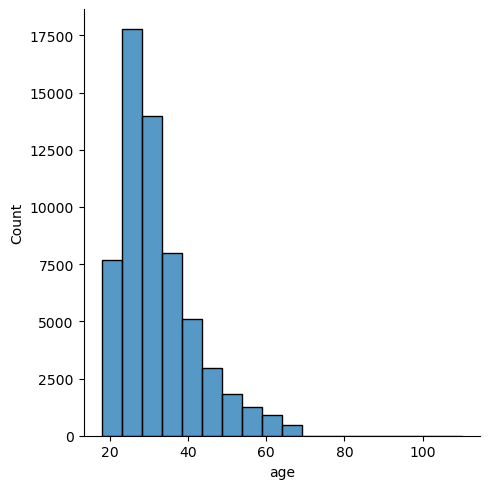

In [21]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)

The following histogram is the same distribution, but separated into genders.

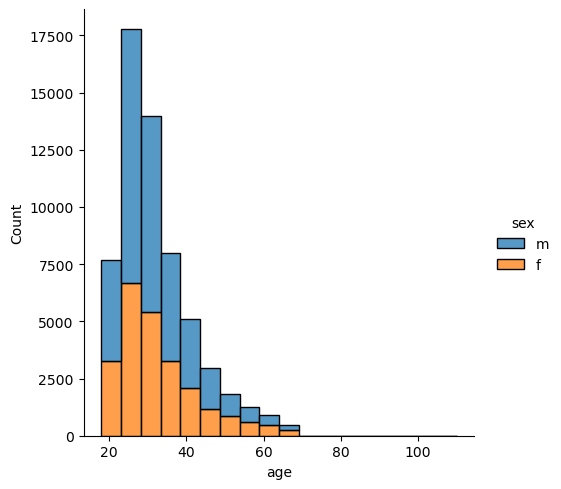

In [23]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack')

Now we will draw some insights about the height variable

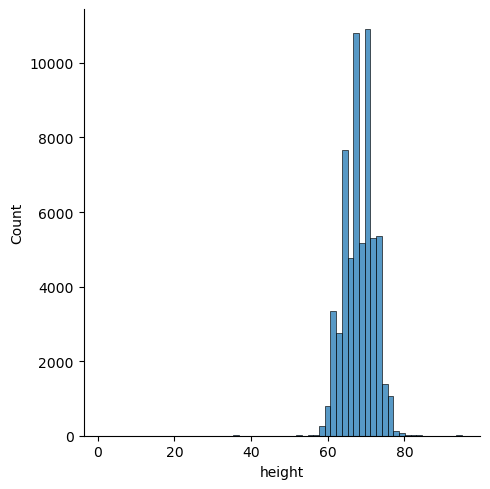

In [25]:
sns.displot(data=profiles, x='height', kind='hist', binwidth=1.5)

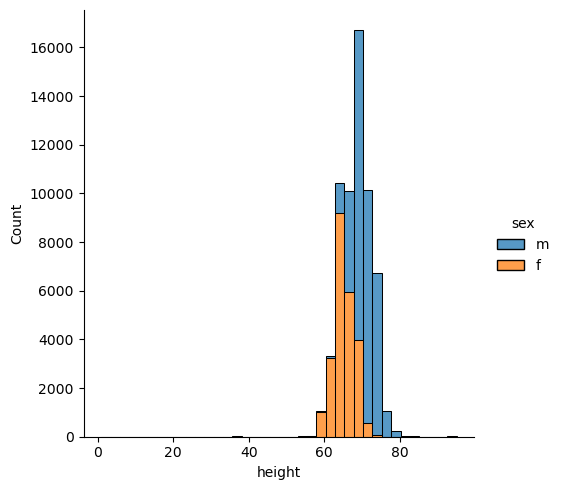

In [26]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=2.5, multiple='stack')

It seems that most men report themselves to be about 6 feet, and most women at just over 5.5 feet tall.

Now we will look at the income variable

In [29]:
print("Highest income reported: ", max(profiles.income))

Highest income reported:  1000000


In [30]:
print("Lowest income reported: ", min(profiles.income))

Lowest income reported:  -1


The negative 1 merely indicates an unanswered prompt.

In [32]:
print((profiles.income==-1).sum())

48442


It seems most incomes are unreported, so we likely can't make any meaningful insights from income.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_positive_incomes(profiles: pd.DataFrame) -> pd.Series:
    """
    Filters the incomes from the profiles DataFrame that are not negative.

    Args:
    profiles (pd.DataFrame): A DataFrame containing profile data, including an 'income' column.

    Returns:
    pd.Series: A Series containing only the non-negative incomes.
    """
    return profiles.loc[profiles['income'] >= 0, 'income']

def plot_positive_incomes(profiles: pd.DataFrame) -> None:
    """
    Plots a histogram of non-negative incomes from the profiles DataFrame.

    Args:
    profiles (pd.DataFrame): A DataFrame containing profile data, including an 'income' column.
    """
    positive_incomes = filter_positive_incomes(profiles)
    
    plt.figure(figsize=(10, 6))
    plt.hist(positive_incomes, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Non-Negative Incomes')
    plt.xlabel('Income')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'profiles' is a DataFrame defined elsewhere with an 'income' column
# plot_positive_incomes(profiles)

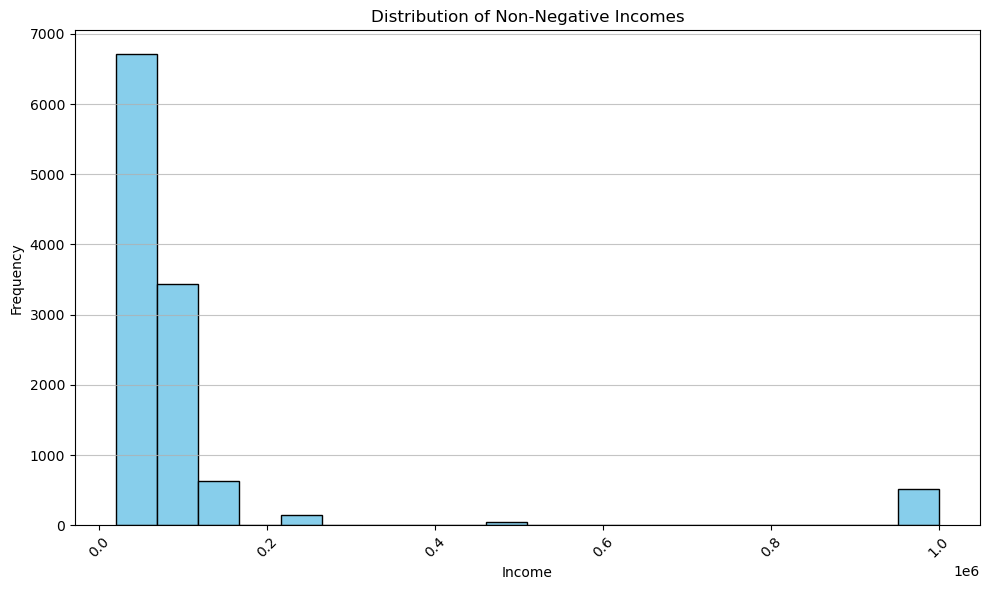

In [35]:
plot_positive_incomes(profiles)
import seaborn as sns
import pandas as pd

def plot_sex_distribution(profiles: pd.DataFrame, palette: str = 'Set2') -> None:
    """
    Plots the distribution of sexes in the given profiles DataFrame using a count plot.

    Args:
    profiles (pd.DataFrame): The DataFrame containing the profiles data.
    palette (str): The color palette to use for the count plot. Default is 'Set2'.
    
    Returns:
    None: This function displays a plot and does not return any value.
    """
    sns.countplot(data=profiles, y='sex', palette=palette)

# Example usage
# plot_sex_distribution(profiles)

Now we will do an exploration of discrete variables.

/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/1354221065.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=profiles, y='sex', palette=palette)


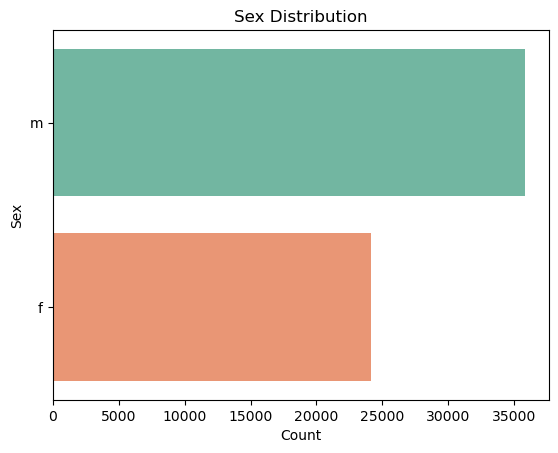

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sex_distribution(profiles: pd.DataFrame, palette: str = 'Set2') -> None:
    """
    Plots the distribution of sexes in the given profiles DataFrame using a count plot.

    Args:
    profiles (pd.DataFrame): The DataFrame containing the profiles data.
    palette (str): The color palette to use for the count plot. Default is 'Set2'.
    
    Returns:
    None: This function displays a plot and does not return any value.
    """
    if 'sex' not in profiles.columns:
        raise ValueError("The 'sex' column is not present in the profiles DataFrame.")
    
    sns.countplot(data=profiles, y='sex', palette=palette)
    plt.title('Sex Distribution')
    plt.xlabel('Count')
    plt.ylabel('Sex')
    plt.show()


plot_sex_distribution(profiles)

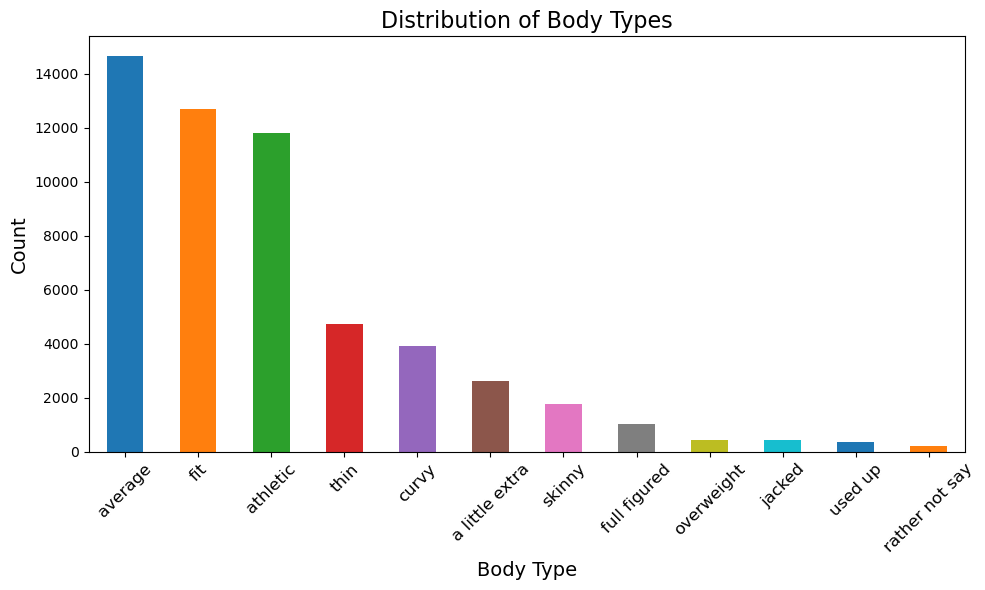

In [38]:
body_type_counts = profiles['body_type'].value_counts()

plt.figure(figsize=(10, 6))
body_type_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Body Types', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

The following bar chart splits shows the body type variable divided by sex.

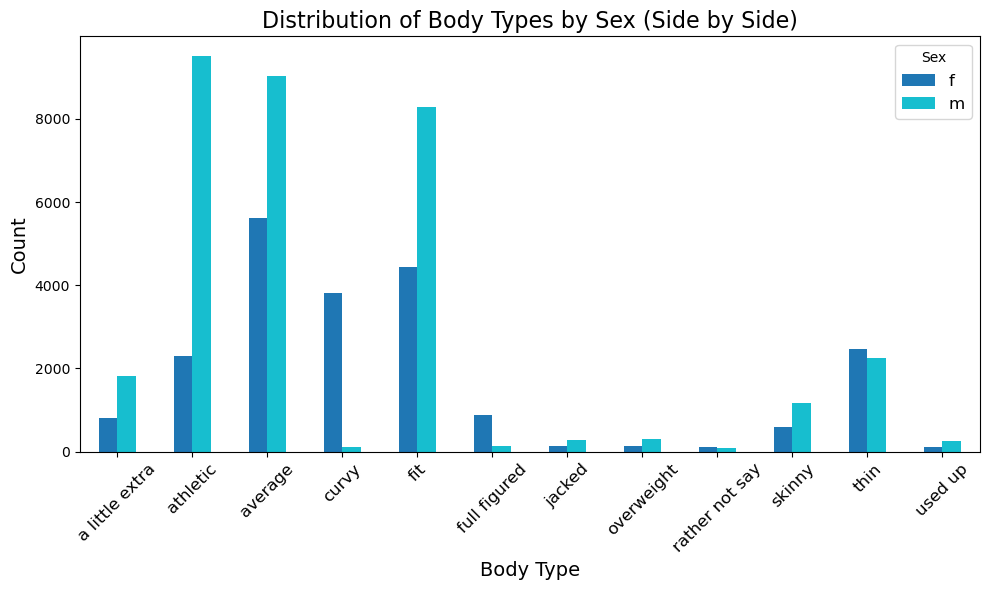

In [40]:
# Plot the bar chart with bars placed side by side
body_type_sex_counts = profiles.groupby(['body_type', 'sex']).size().unstack()
body_type_sex_counts.plot(kind='bar', figsize=(10, 6), colormap='tab10')

# Add titles and labels
plt.title('Distribution of Body Types by Sex (Side by Side)', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Sex', fontsize=12)
plt.tight_layout()
plt.show()

The following barchart shows the a distribution of the diet feature.  The most common diet types are loose diets, like 'mostly anything', followed by 'mostly vegetarian' which is the fourth most common.

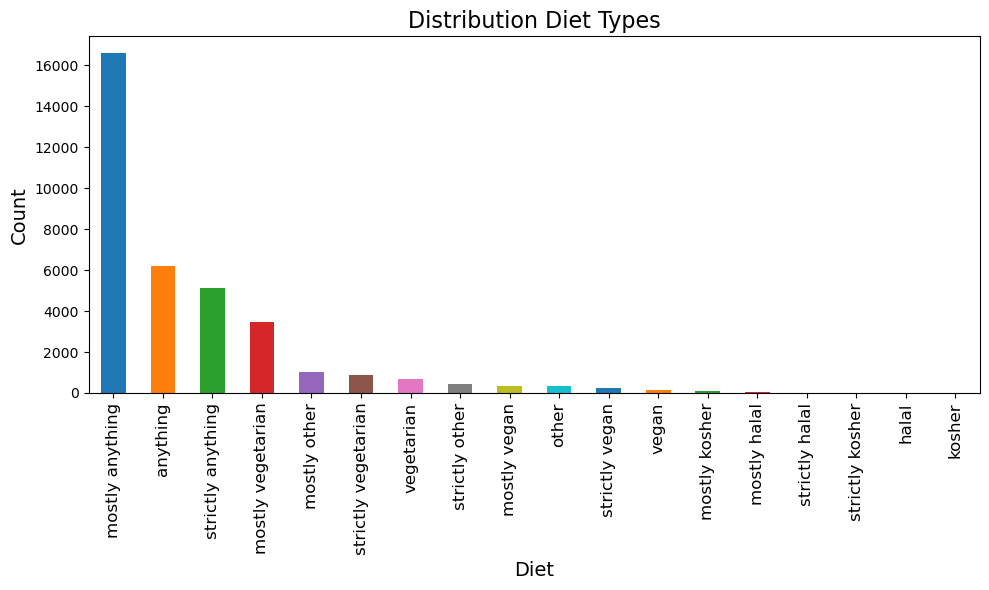

In [42]:
diet_counts = profiles['diet'].value_counts()

plt.figure(figsize=(10, 6))
diet_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Diet Types', fontsize=16)
plt.xlabel('Diet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

The following barchart shows a distribution of drinking habit, socially being the most common.

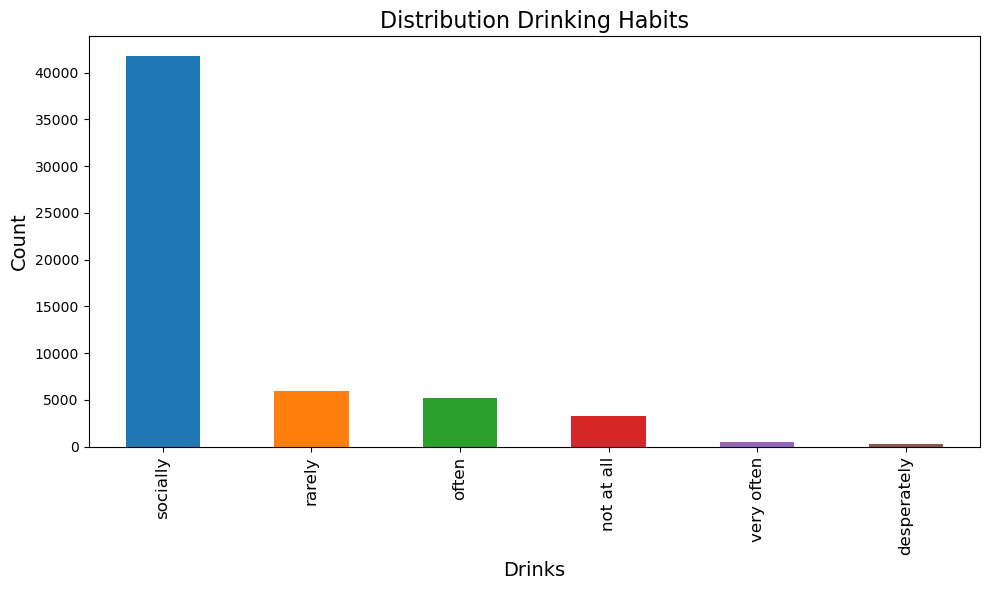

In [44]:
drink_counts = profiles['drinks'].value_counts()

plt.figure(figsize=(10, 6))
drink_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Drinking Habits', fontsize=16)
plt.xlabel('Drinks', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now we will do the same with the 'Drugs' feature. Most users, 'never' use drugs.

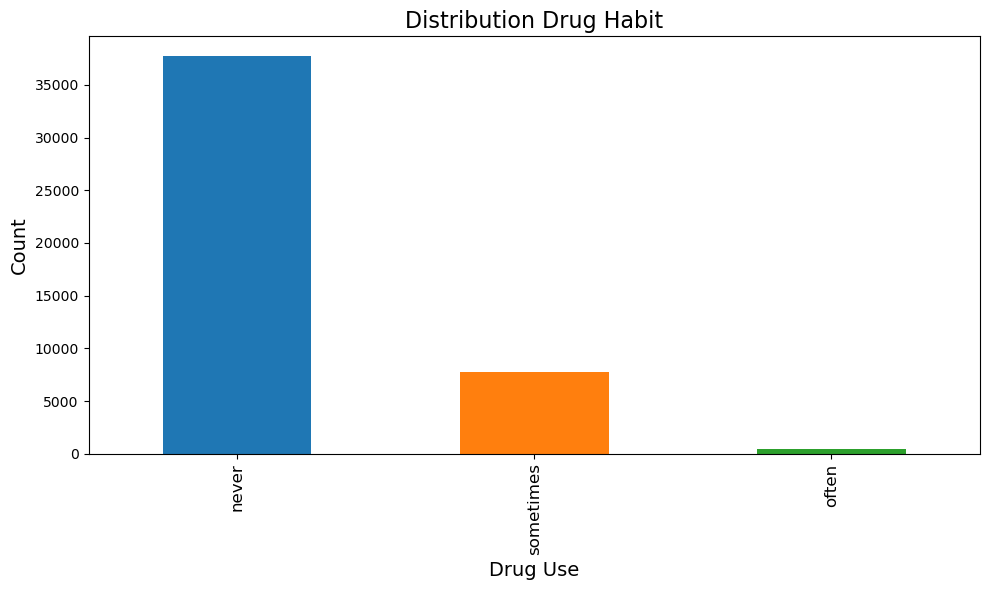

In [46]:
drug_counts = profiles['drugs'].value_counts()

plt.figure(figsize=(10, 6))
drug_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Drug Habit', fontsize=16)
plt.xlabel('Drug Use', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Next we will explore user education level in the same way. A vast majority of users graduated from college or university, the second most common response graduated from a masters program, and the third most common is that they are currently in college or university.

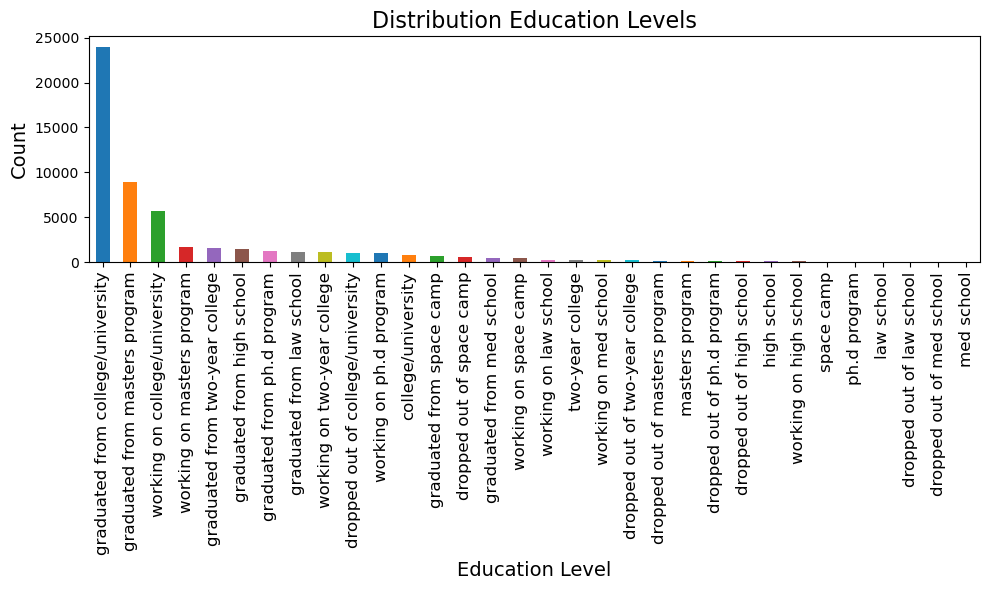

In [48]:
education_counts = profiles['education'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

We will now explore jobs in a similar fashion. The least common response was military, which was surprising.  The next to the least were unemployed and retired, which wasn't surprising.

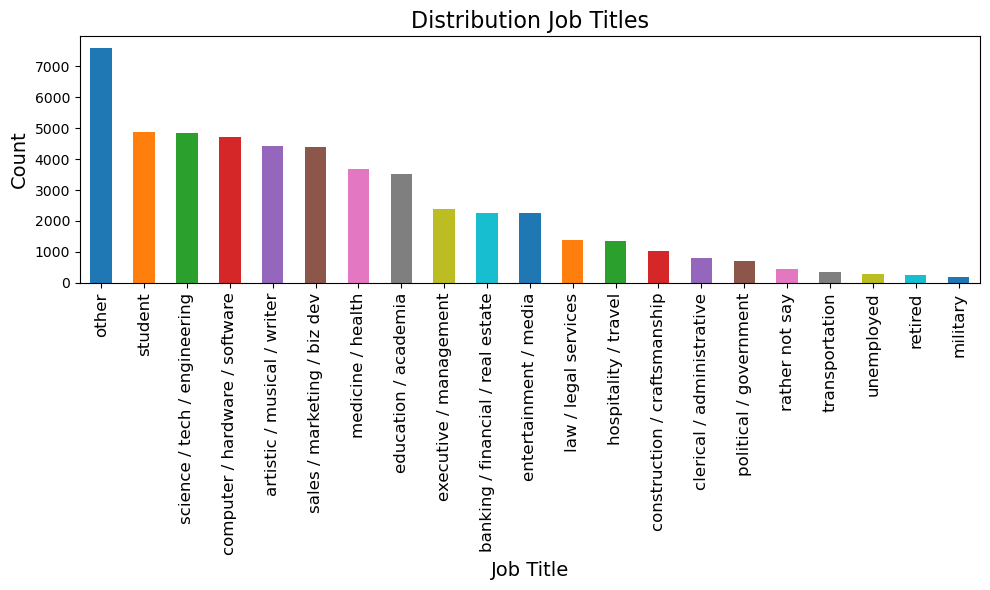

In [50]:
job_counts = profiles['job'].value_counts()

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now we will look at how common it is that users have children. The majority of users simply responded that they don't have kids.  The second most common response was that they don't have kids, but might want them.

In [52]:
print(profiles['offspring'].value_counts())

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64


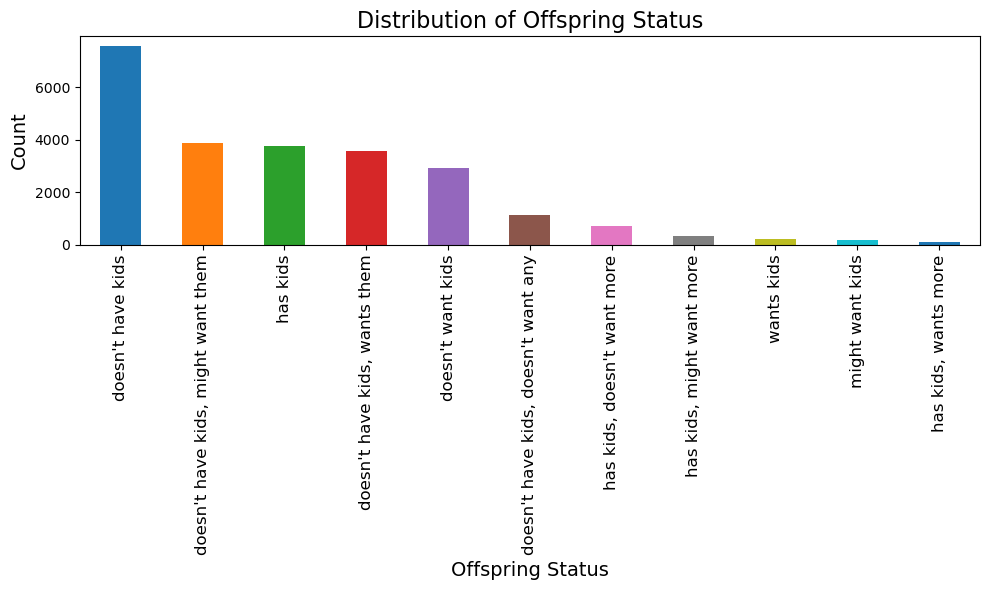

In [53]:
# Clean up the 'offspring' column by replacing HTML entities and standardizing phrases in the existing 'profiles' DataFrame
profiles['offspring'] = profiles['offspring'].replace({
    'doesn&rsquo;t': "doesn't",
    'has a kid': 'has kids',
    'doesn&rsquo;t have kids': "doesn't have kids",
    'doesn&rsquo;t want any': "doesn't want any"
}, regex=True)

# Combine similar categories for better clarity
profiles['offspring'] = profiles['offspring'].replace({
    "doesn't have kids, but might want them": "doesn't have kids, might want them",
    "doesn't have kids, but wants them": "doesn't have kids, wants them",
    "doesn't have kids, and doesn't want any": "doesn't have kids, doesn't want any",
    "has kids, but doesn't want more": "has kids, doesn't want more",
    "has kids, and might want more": "has kids, might want more",
    "has kids, and wants more": "has kids, wants more"
})

# Create a bar chart for the cleaned 'offspring' feature
offspring_counts = profiles['offspring'].value_counts()

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
offspring_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Offspring Status', fontsize=16)
plt.xlabel('Offspring Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now we will take a look at sexual orientation.  A vast majority of users identify as straight.

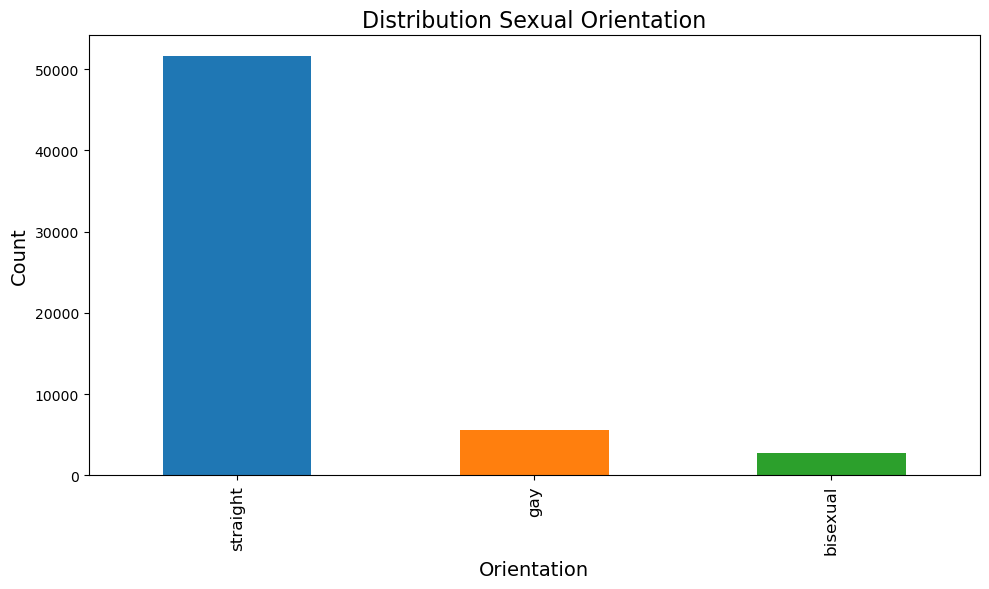

In [55]:
orientation_counts = profiles['orientation'].value_counts()

plt.figure(figsize=(10, 6))
orientation_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution Sexual Orientation', fontsize=16)
plt.xlabel('Orientation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Curiously, there are more female bisexuals than male.

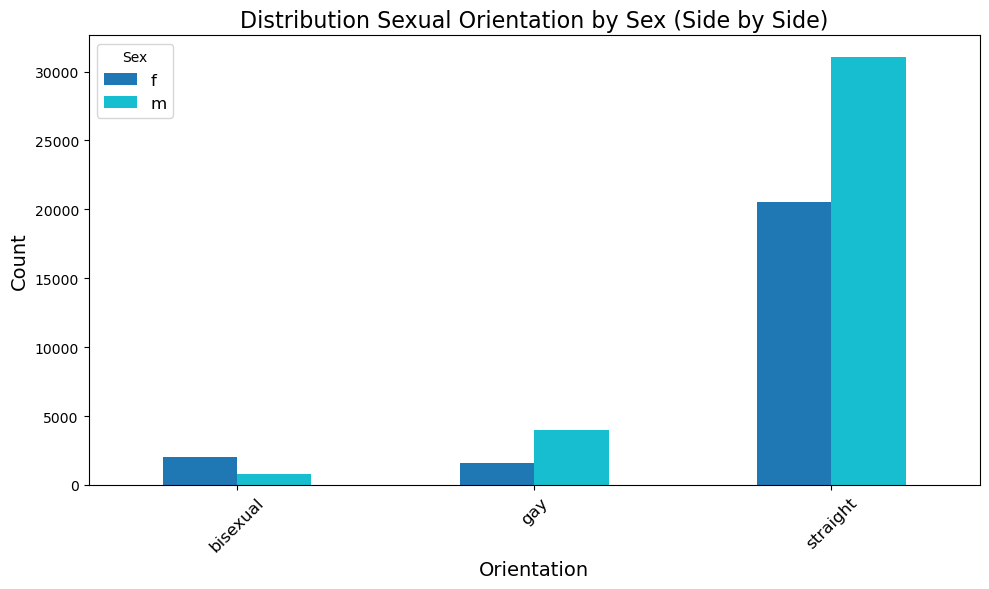

In [57]:
# Plot the bar chart with bars placed side by side
orientation_sex_counts = profiles.groupby(['orientation', 'sex']).size().unstack()
orientation_sex_counts.plot(kind='bar', figsize=(10, 6), colormap='tab10')

# Add titles and labels
plt.title('Distribution Sexual Orientation by Sex (Side by Side)', fontsize=16)
plt.xlabel('Orientation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Sex', fontsize=12)
plt.tight_layout()
plt.show()

Now we will look at the distribution of pet ownership.  Most don't have pets, but like them!

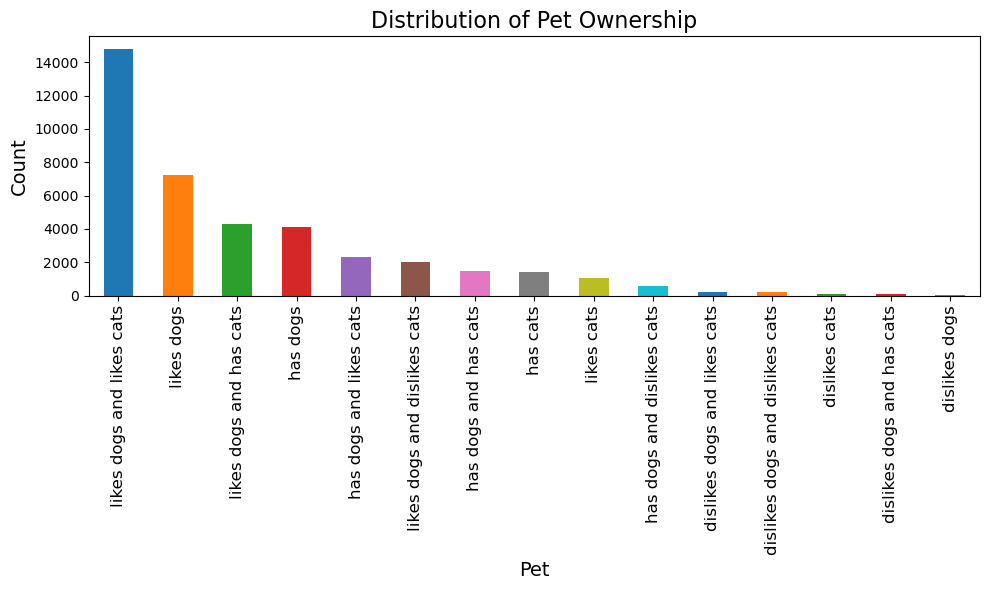

In [59]:
pet_counts = profiles['pets'].value_counts()

plt.figure(figsize=(10, 6))
pet_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Pet Ownership', fontsize=16)
plt.xlabel('Pet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now we will look at the different responses for religion

In [61]:
print(profiles['religion'].value_counts())

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

There are a lot of different responses for religion, many of them technically the same but worded differently.  We will clean them so it is easier to show a distribution, and then plot them on a barchart.  Agnosticism is the most commonly reported religion, and islam is the least common.

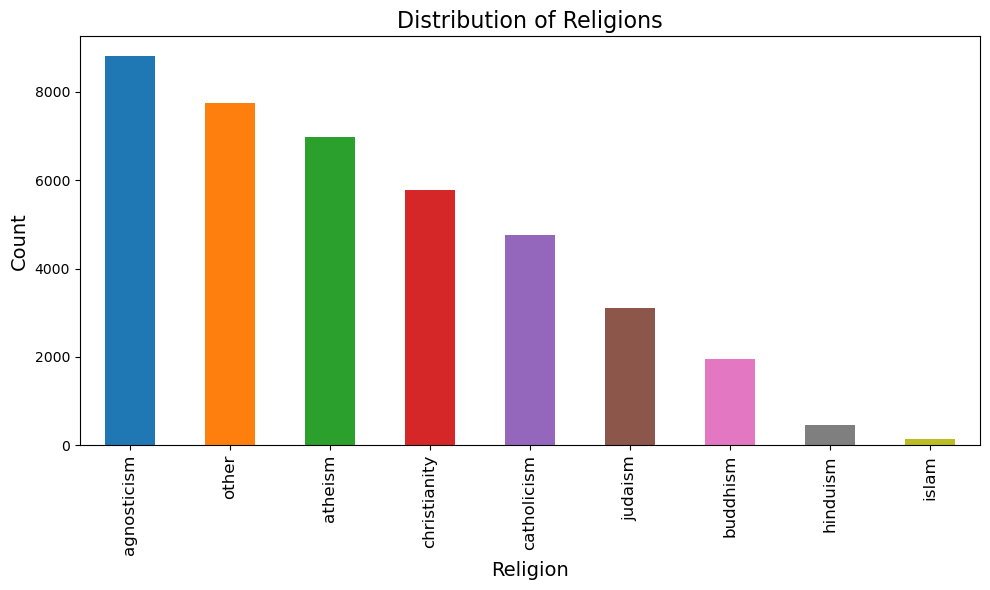

In [63]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
religionCleaned_counts = profiles['religionCleaned'].value_counts()

plt.figure(figsize=(10, 6))
religionCleaned_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Religions', fontsize=16)
plt.xlabel('Religion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now let's see how many users smoke! 

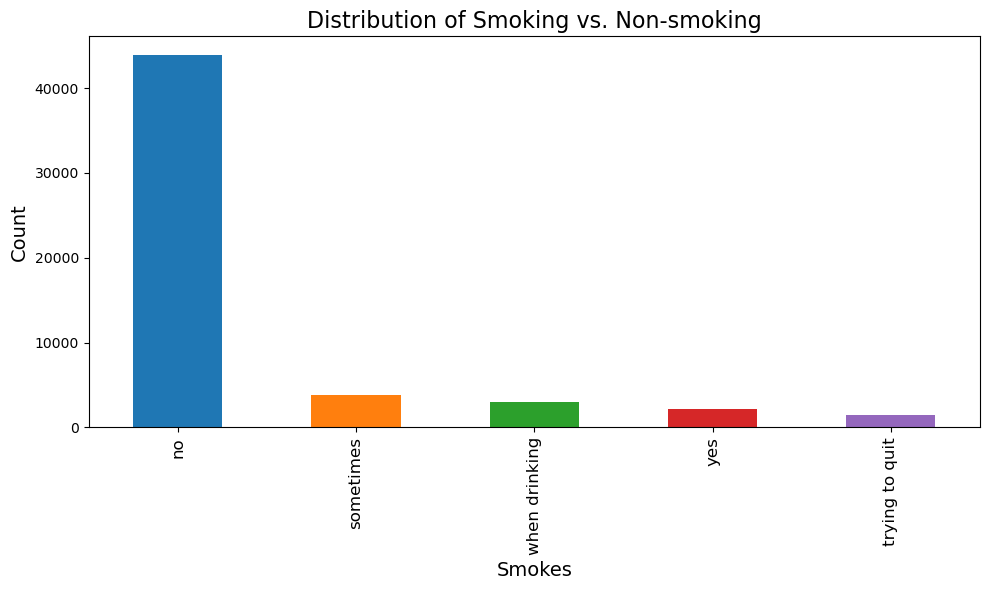

In [65]:
smokes_counts = profiles['smokes'].value_counts()

plt.figure(figsize=(10, 6))
smokes_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Smoking vs. Non-smoking', fontsize=16)
plt.xlabel('Smokes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In the same way, we will look at relationship statuses of users. Unsurprisingly, most users are single.

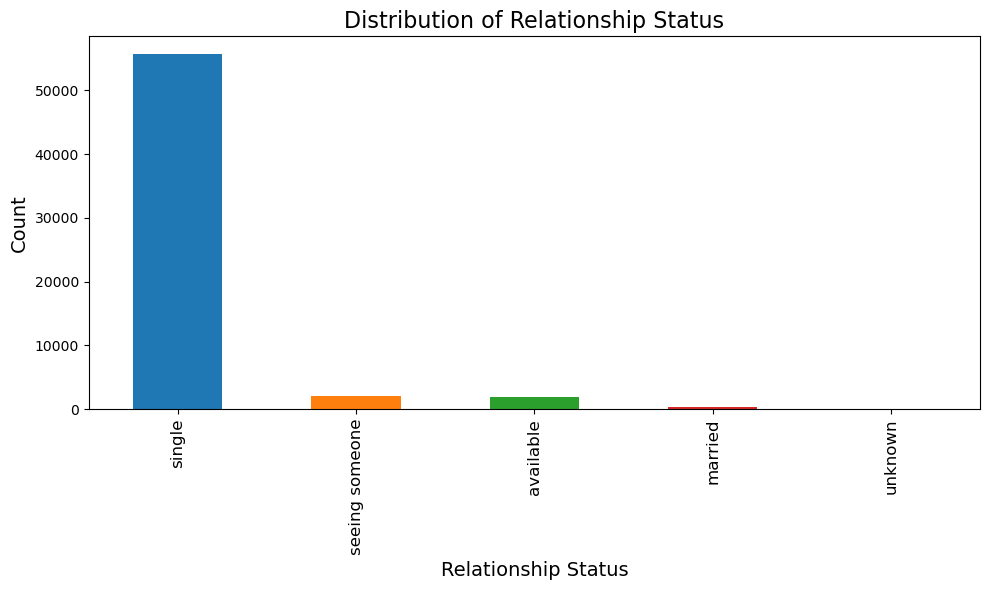

In [67]:
status_counts = profiles['status'].value_counts()

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Relationship Status', fontsize=16)
plt.xlabel('Relationship Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Finally, before getting to our predictive model, we will look at the distribution of zodiac signs!

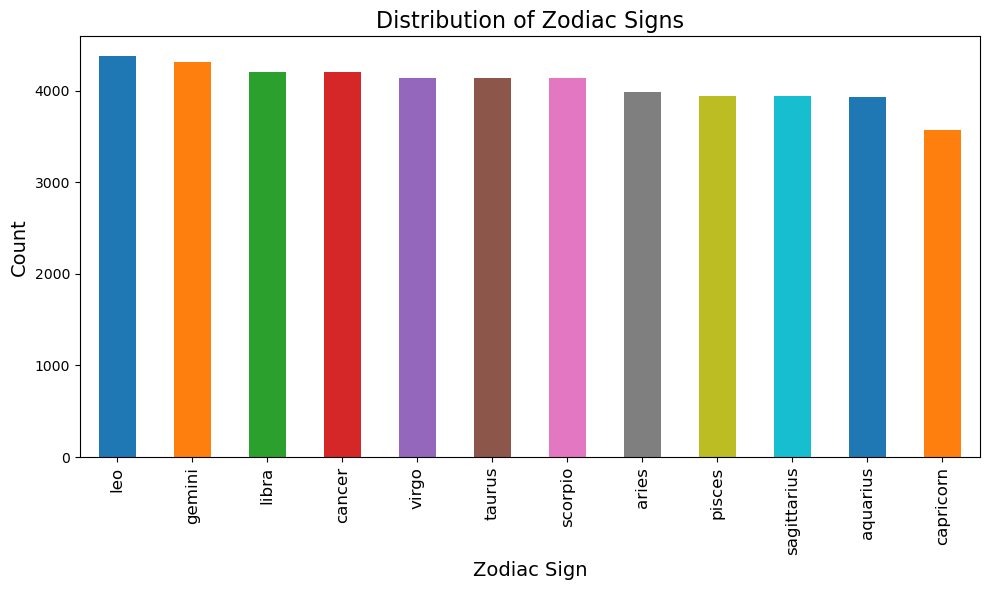

In [69]:
zodiac_counts = profiles['signsCleaned'].value_counts()

plt.figure(figsize=(10, 6))
zodiac_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Distribution of Zodiac Signs', fontsize=16)
plt.xlabel('Zodiac Sign', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Now we will look at some basic statistics from the data set.

In [71]:
print("Average age of user: ", np.mean(profiles.age))

Average age of user:  32.3402895939679


In [72]:
print("Average height of user: ", np.mean(profiles.height))

Average height of user:  68.29528051649066


In [73]:
print("Average income of user: ", np.mean(profiles.income))

Average income of user:  20033.222533613585


Now we will handle missing data.

In [75]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

In [76]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

After dropping the null data, we will now create dummy variables to handle the categorical variables.

In [78]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])

In [79]:
print(df.head())

  signsCleaned  body_type_a little extra  body_type_athletic  \
0       gemini                      True               False   
1       cancer                     False               False   
5       taurus                     False               False   
7  sagittarius                     False               False   
9       cancer                     False                True   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0              False            False          False                   False   
1               True            False          False                   False   
5               True            False          False                   False   
7               True            False          False                   False   
9              False            False          False                   False   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0             False                 False                 

Now we will check to see if there are any imbalances in the variable (sign) we hope to build a model on.  And based on the following output, we are mostly balanced.

In [81]:
df.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

Now we will split the data into train and test sets in order to prep them for testing.

In [83]:
col_length = len(df.columns)

# X is all columns other than the sign column, y is the signs column
X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

Now we will beging to build our model, starting with importing some common algorithms, Logistic Regression, Decision Trees, and KNN.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardize features after generating polynomial terms
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(poly.transform(X_test))

In [314]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Create polynomial features for X_train
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Transform X_test using the same polynomial transformation
X_test_poly = poly.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_poly, y_train)

# Predict using the transformed test data
y_pred = model.predict(X_test_poly)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")

Recall: 0.08304363500685376
Accuracy: 0.08264965056213917
Confusion Matrix: [[21 25 22 22 12 19 14 21 19 14 17 25]
 [32 20 32 15 26 36 19 24 18 18 25 20]
 [16 26 28 12 23 33 27 15 16 21 25 25]
 [22 13 30 21 20 19 26 14 15 20 23 22]
 [31 24 38 18 25 33 21 20 15 26 19 26]
 [25 23 28 21 31 23 26 20 24 29 28 30]
 [16 21 38 11 25 29 24 14 23 17 23 23]
 [17 24 34 18 22 23 24 22 21 19 21 30]
 [22 20 26 22 23 25 14 17 22 16 26 28]
 [26 29 24 23 24 31 21 20 24 22 14 26]
 [24 11 32 16 17 24 20 33 27 28 21 35]
 [22 23 36 19 23 32 16 25 26 26 16 23]]


<Figure size 1000x800 with 0 Axes>

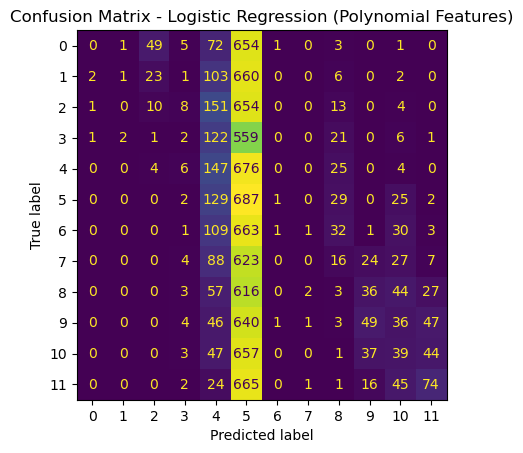

In [320]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict using the trained logistic regression model (already done in your case)
# y_pred = model.predict(X_test_poly)  # You already did this, so no need to rerun.

# Step 2: Compute the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred)

# Step 3: Plot the heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot(cmap='viridis', values_format='d', colorbar=False)
plt.title("Confusion Matrix - Logistic Regression (Polynomial Features)")
plt.show()

With an accuracy score of about 8%, Logistic Regression is not very efficient, and thus is probably not the model to go with.

Now we will run a KNN model and see if it does any better.

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Define a parameter grid for GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # How neighbors are weighted
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Run Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [238]:
best_params = grid_search.best_params_  # Store the best parameters
print(best_params)  # Check available keys

# Train KNN with the best parameters
best_knn = KNeighborsClassifier(
    n_neighbors=best_params.get('n_neighbors', 5),  # Default to 5 if key is missing
    weights=best_params.get('weights', 'uniform'),  # Default to 'uniform'
    metric=best_params.get('metric', 'euclidean')   # Default to 'euclidean'
)

{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [240]:
# Fit the best KNN model
best_knn.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"🛑 Confusion Matrix:\n{cm}")

/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/1467076405.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_knn.fit(X_train, y_train.ravel())


✅ Accuracy: 0.4362
🔄 Recall: 0.4338
🛑 Confusion Matrix:
[[315 262 104  40  31  26   6   0   1   0   1   0]
 [125 303 190  75  59  37   7   1   0   1   0   0]
 [ 32 124 334 180 102  56  10   3   0   0   0   0]
 [ 13  29 109 283 199  68  10   3   0   1   0   0]
 [ 10  19  40  72 484 196  32   4   4   1   0   0]
 [  4  12  20  25 127 573  86  20   4   2   2   0]
 [  8   4  16  15  41 178 493  59  14  13   0   0]
 [  5   1   6  10  26  74 245 354  49  13   4   2]
 [  2   1   5   9  14  39  93 227 329  60   8   1]
 [  0   3   5   0  11  35  53 124 243 275  64  14]
 [  2   2   4   4   6  21  41  49  97 273 256  73]
 [  0   2   5   4   5  23  29  29  71 130 264 266]]


### K Nearest Means performs WAY better at over 43% accuracy!

Now we'll standardize our data and see if it improves accuracy

In [243]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain KNN on scaled data
best_knn.fit(X_train_scaled, y_train.ravel())

# Predict again
y_pred_scaled = best_knn.predict(X_test_scaled)

# Evaluate again
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled, average='macro')

print(f"✅ Scaled Accuracy: {accuracy_scaled:.4f}")
print(f"🔄 Scaled Recall: {recall_scaled:.4f}")

/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/12002392.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_knn.fit(X_train_scaled, y_train.ravel())


✅ Scaled Accuracy: 0.5238
🔄 Scaled Recall: 0.5225


In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid (forcing Euclidean metric)
param_grid = {
    'n_neighbors': list(range(3, 51, 2)),  # Odd numbers to avoid ties
    'weights': ['uniform', 'distance'],  # Test both equal and distance-based weighting
    'metric': ['euclidean']  # ✅ Only use Euclidean distance
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1
)

from imblearn.over_sampling import SMOTE

# Fit the model on scaled data
from imblearn.over_sampling import SMOTE

# Fit the model on scaled data (unchanged)
grid_search.fit(X_train_scaled, y_train.ravel())

# Apply SMOTE after grid search (before training the final model)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # ✅ Auto-balances all classes
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Print new class distribution
print(pd.Series(y_train_balanced).value_counts())  # ✅ Check balance

# Best parameters
print("🔍 Best Parameters:", grid_search.best_params_)

# Train KNN with best parameters but reduced neighbors
best_knn = KNeighborsClassifier(
    n_neighbors=15,  # ✅ Reduce neighbors to prevent overfitting
    weights='uniform',
    metric='euclidean'
)  

# Retrain with balanced data
best_knn.fit(X_train_balanced, y_train_balanced.ravel())

# Predict
y_pred_tuned = best_knn.predict(X_test_scaled)

# Evaluate
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned, average='macro')

print(f"✅ Tuned Accuracy: {accuracy_tuned:.4f}")
print(f"🔄 Tuned Recall: {recall_tuned:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/3459937963.py:30: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train_scaled, y_train.ravel())
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


target
11    3499
3     3499
5     3499
4     3499
2     3499
9     3499
0     3499
7     3499
6     3499
10    3499
8     3499
1     3499
Name: count, dtype: int64
🔍 Best Parameters: {'metric': 'euclidean', 'n_neighbors': 49, 'weights': 'distance'}


/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/3459937963.py:50: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_knn.fit(X_train_balanced, y_train_balanced.ravel())


✅ Tuned Accuracy: 0.5576
🔄 Tuned Recall: 0.5568


In [309]:
# Prepare unknown user data for prediction
X_unknown = unknown_signs.drop(columns=['sign', 'signsCleaned'], errors='ignore')

# Ensure categorical encoding matches training set
X_unknown_categorical = X_unknown[categorical_cols].astype(str).reset_index(drop=True)
X_unknown_encoded = encoder.transform(X_unknown_categorical)

# Drop original categorical columns and merge with encoded features
X_unknown = X_unknown.drop(columns=categorical_cols).reset_index(drop=True)
X_unknown = pd.concat([X_unknown, X_unknown_encoded], axis=1)

# 🛑 Drop 'predicted_sign' column if it exists to avoid feature mismatch
X_unknown = X_unknown.drop(columns=['predicted_sign'], errors='ignore')

# Fill missing values with mean values from the training set
X_unknown = X_unknown.fillna(X_train_balanced.mean())

# Scale the unknown data using the same scaler used during training
X_unknown_scaled = scaler.transform(X_unknown)

# Predict zodiac signs for users with missing signs
predicted_signs = best_knn.predict(X_unknown_scaled)

# Convert numeric predictions back to zodiac names
predicted_signs_labels = y_encoder.inverse_transform(predicted_signs)

# Store predictions in the original DataFrame
unknown_signs.loc[:, 'predicted_sign'] = predicted_signs_labels

# Display distribution of predicted zodiac signs
print(unknown_signs['predicted_sign'].value_counts())

predicted_sign
leo            5726
libra          4550
gemini          346
pisces          200
capricorn        91
aries            35
sagittarius      33
cancer           23
aquarius         20
scorpio          12
taurus           12
virgo             8
Name: count, dtype: int64


In [295]:
y_pred_tuned = best_knn.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned, average='macro')

print(f"✅ Tuned Accuracy: {accuracy_tuned:.4f}")
print(f"🔄 Tuned Recall: {recall_tuned:.4f}")

✅ Tuned Accuracy: 0.5512
🔄 Tuned Recall: 0.5493


In [297]:
X_unknown_scaled = scaler.transform(X_unknown)
predicted_signs = best_knn.predict(X_unknown_scaled)
predicted_signs_labels = y_encoder.inverse_transform(predicted_signs)

unknown_signs['predicted_sign'] = predicted_signs_labels

# Check the distribution again
print(unknown_signs['predicted_sign'].value_counts())

predicted_sign
leo            5914
libra          4314
gemini          457
pisces          198
capricorn        48
aquarius         26
aries            23
cancer           23
sagittarius      14
scorpio          14
virgo            13
taurus           12
Name: count, dtype: int64


/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/1061102112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_signs['predicted_sign'] = predicted_signs_labels


In [287]:
print(y_train.value_counts())

target
5     3499
4     3448
6     3366
2     3365
11    3313
10    3312
9     3307
1     3191
7     3157
8     3154
0     3142
3     2858
Name: count, dtype: int64


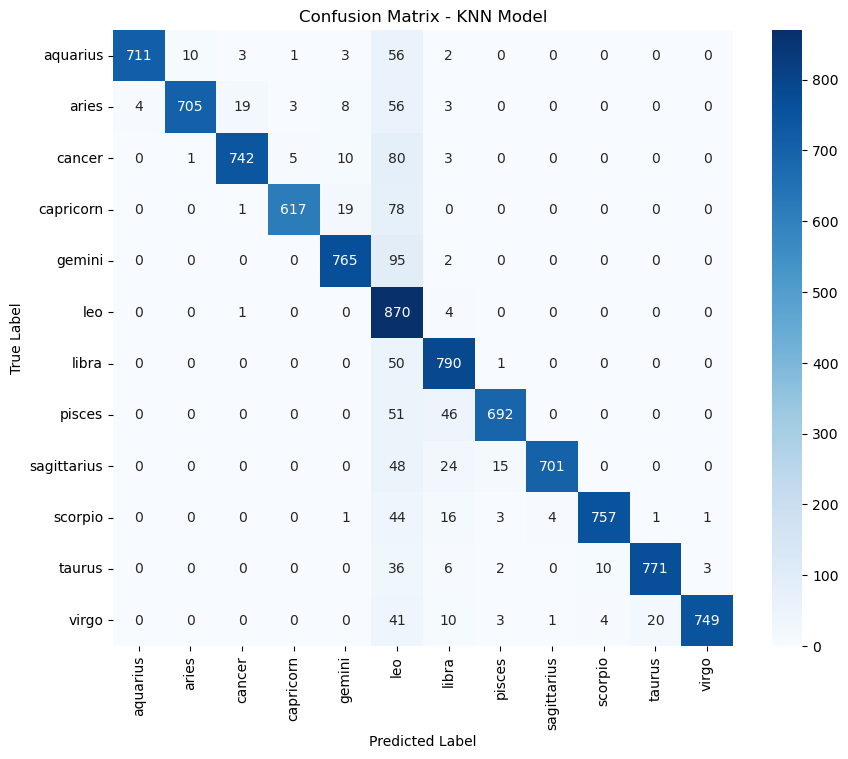

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Model")
plt.show()

The KNN model initially looked to be more accurate, but it's clearly overfit and favors only a couple zodiac signs.

Now we will run a Decision Tree Classifier model and test it's performance metrics.

In [97]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize and search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [98]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_pred = y_pred[:len(y_test)]

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.09238756512212888


In [100]:
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")

Recall: 0.0798777928078616
Accuracy: 0.07869948343968398
Confusion Matrix: [[24 24 12 27 16 22 23 23 27 20 14 23]
 [20 23 26 22 23 20 28 21 28 21 27 19]
 [29 16 26 17 22 15 16 33 26 19 21 21]
 [20 23 11 26 16 18 15 16 24 23 15 24]
 [34 25 19 35 22 34 19 27 27 26 24 23]
 [27 25 29 35 20 20 25 27 21 31 24 20]
 [36 22 17 25 22 16 23 23 15 20 25 23]
 [23 28 23 31 20 22 15 19 26 19 19  9]
 [29 22 17 32 13 18 25 21 26 21 15 24]
 [25 29 17 36 16 19 30 28 27 21 17 24]
 [25 26 29 29 13 22 17 18 31 19 15 30]
 [30 30 25 29 28 22 21 24 28 30 19 14]]


In [101]:
# Get feature importance from the model
feature_importance = best_tree.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with the column names of your dataset
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
64  job_education / academia    0.164974
44           pets_likes dogs    0.158910
4              body_type_fit    0.100204
73        job_rather not say    0.081080
34        pets_dislikes dogs    0.080185
..                       ...         ...
26       diet_strictly vegan    0.000000
25       diet_strictly other    0.000000
24      diet_strictly kosher    0.000000
23       diet_strictly halal    0.000000
79            job_unemployed    0.000000

[80 rows x 2 columns]


In [102]:
# Identify features with zero importance
zero_importance_features = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature']

# Drop these features from X_train and X_test
X_train_reduced = X_train.drop(columns=zero_importance_features)
X_test_reduced = X_test.drop(columns=zero_importance_features)

In [103]:
# Select the top 10 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature']

# Filter X_train and X_test for these features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [104]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=best_tree, n_features_to_select=10)
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Filter datasets
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [105]:
X_train_final = X_train_rfe  
X_test_final = X_test_rfe  

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV with the reduced dataset
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_final, y_train)

# Retrieve the best model
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [107]:
# Train the Decision Tree with the best parameters
best_tree = DecisionTreeClassifier(
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced',  
    random_state=42
)
best_tree.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = best_tree.predict(X_test_final)

In [108]:
# Calculate metrics
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")

Recall: 0.0804929004257023
Accuracy: 0.08113035551504102
Confusion Matrix:
[[  0   4   0   2   2  10 103  29  17   4  13  71]
 [  0   1   0   1   1  12 118  29  19   2  24  71]
 [  1   1   0   2   2   4 109  29  19   9  16  69]
 [  2   3   0   3   1   4  92  22  27   6  14  57]
 [  1   6   0   4   1   8 128  35  19   5  19  89]
 [  1   4   0   1   1  13 133  21  25   3  19  83]
 [  1   3   0   1   1  11 118  26  14   7   7  78]
 [  2   3   0   0   2  10 103  23  20   6  17  68]
 [  1   0   0   4   5   7  97  27  15   5   9  93]
 [  0   2   0   3   3   7 128  30  25   3  14  74]
 [  0   6   0   2   3  13 111  29  24   3  11  72]
 [  0   2   0   5   2   9 126  23  25   7  22  79]]


In [109]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_tree, X_train_final, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean()}")

Cross-validated accuracy: 0.08516941277242204


<Figure size 1000x800 with 0 Axes>

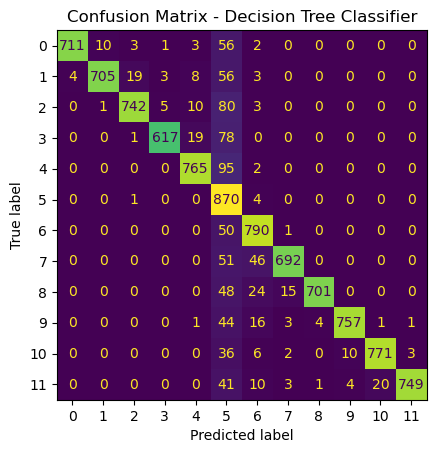

In [322]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', values_format='d', colorbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

With an accuracy of 8.5% the decision tree classifier doesn't look to be the best algorithm to solve our problem.  I will now try with a random forest.

In [111]:
known_signs = profiles[profiles['sign'].notna()]
unknown_signs = profiles[profiles['sign'].isna()]
y = known_signs['signsCleaned']
X = known_signs.drop(columns=['sign', 'signsCleaned'])

After defining our target variable, we will encode categorical features

In [113]:
!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [114]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [115]:
print(f"Type of y before encoding: {type(y)}")
print(f"y sample:\n{y.head()}")

Type of y before encoding: <class 'pandas.core.series.Series'>
y sample:
0      gemini
1      cancer
2      pisces
3      pisces
4    aquarius
Name: signsCleaned, dtype: object


In [116]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# ✅ Convert y to numeric labels
y_encoder = LabelEncoder()
y_numeric = y_encoder.fit_transform(y)  # Convert string categories to numbers
y = pd.Series(y_numeric, name="target", index=X.index)  # Convert back to Series with the same index

# ✅ Reset index to avoid misalignment
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# ✅ Convert categorical features to string type
X_categorical = X[categorical_cols].astype(str)

# ✅ Print type of y for debugging
print(f"Type of y before encoding: {type(y)}")  # Should be <class 'pandas.core.series.Series'>
print(f"y sample after conversion:\n{y.head()}")  # Should now be numeric values

# Apply Target Encoding
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X_categorical, y)  # ✅ Now y is correctly formatted as numbers!

# Merge encoded categorical features back into X
X = X.drop(columns=categorical_cols).reset_index(drop=True)  # Drop original categorical columns
X = pd.concat([X, X_encoded], axis=1)  # Merge encoded columns

Type of y before encoding: <class 'pandas.core.series.Series'>
y sample after conversion:
0    4
1    2
2    7
3    7
4    0
Name: target, dtype: int64


In [117]:
# Apply Target Encoding
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X_categorical, y)  # ✅ Should work now!

# Merge encoded categorical features back into X
X = X.drop(columns=categorical_cols).reset_index(drop=True)  # Drop original categorical columns
X = pd.concat([X, X_encoded], axis=1)  # Merge encoded columns

print("✅ Target Encoding completed successfully!")

✅ Target Encoding completed successfully!


Now we will handle missing values.

In [119]:
X = X.fillna(X.mean())

Now we will Train-Test-Split our data.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

And now we will train a Random Forest model.

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [124]:
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"🛑 Confusion Matrix:\n{cm}")

🎯 Accuracy: 0.9609
🔄 Recall: 0.9606
🛑 Confusion Matrix:
[[751   0   0   0   0   2  33   0   0   0   0   0]
 [  0 760   0   0   0   6  32   0   0   0   0   0]
 [  0   0 801   0   1   4  35   0   0   0   0   0]
 [  0   1   0 679   0  10  25   0   0   0   0   0]
 [  0   0   0   0 832  10  20   0   0   0   0   0]
 [  0   0   0   0   0 854  21   0   0   0   0   0]
 [  0   0   0   0   0   2 839   0   0   0   0   0]
 [  0   0   0   0   0   3  35 751   0   0   0   0]
 [  0   0   0   0   0   3  26   0 759   0   0   0]
 [  0   0   0   0   0  15  29   0   0 783   0   0]
 [  0   0   0   0   0  13  22   0   0   0 793   0]
 [  0   0   0   0   0  23  10   1   0   0   0 794]]


Wow!  With an accuracy of above 96% this model is performing exceptionally well!

In [126]:
X_unknown = unknown_signs.drop(columns=['sign', 'signsCleaned'])

X_unknown_categorical = X_unknown[categorical_cols].astype(str).reset_index(drop=True)
X_unknown_encoded = encoder.transform(X_unknown_categorical)

X_unknown = X_unknown.drop(columns=categorical_cols).reset_index(drop=True)
X_unknown = pd.concat([X_unknown, X_unknown_encoded], axis=1)

X_unknown = X_unknown.fillna(X.mean())

With a highly accurate model, we can now predict our missing signs!

In [128]:
X_unknown = X_unknown[X_train.columns]

# Predict zodiac signs for users who didn't enter them
predicted_signs = rf_model.predict(X_unknown)

# Convert numeric predictions back to zodiac names
predicted_signs_labels = y_encoder.inverse_transform(predicted_signs)

# Store predictions in the original DataFrame
unknown_signs.loc[:, 'predicted_sign'] = predicted_signs_labels

# Display some predictions
print(unknown_signs[['predicted_sign']].head(10))

   predicted_sign
13            leo
28          libra
31          libra
35          libra
39          libra
40          libra
46          libra
48          libra
53          libra
54          libra


/var/folders/0j/9lgrdx_x28j1wyh568ynjyn40000gn/T/ipykernel_75170/3780481176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_signs.loc[:, 'predicted_sign'] = predicted_signs_labels


It looks like it is predicting everything to be Libra.  It may be overfit to specific parts of data.  Let's visualize what is going on.

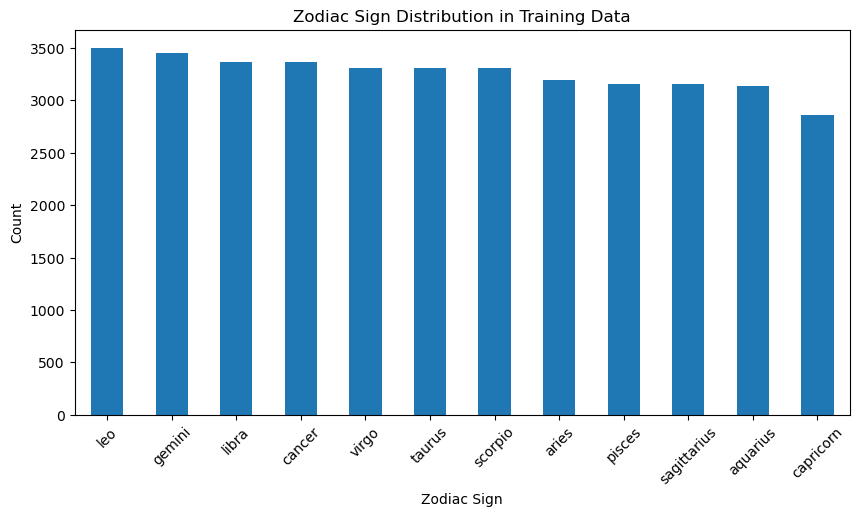

In [130]:
import matplotlib.pyplot as plt

# Count occurrences of each zodiac sign in training data
y_train_labels = y_encoder.inverse_transform(y_train)  # Convert back to original sign names
sign_counts = pd.Series(y_train_labels).value_counts()

# Plot the distribution
plt.figure(figsize=(10,5))
sign_counts.plot(kind='bar')
plt.title("Zodiac Sign Distribution in Training Data")
plt.xlabel("Zodiac Sign")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

   Feature  Importance
8   essay0    0.190991
9   essay1    0.167847
12  essay4    0.127149
13  essay5    0.119414
10  essay2    0.106614
15  essay7    0.074882
17  essay9    0.073650
14  essay6    0.053747
11  essay3    0.035778
16  essay8    0.033101


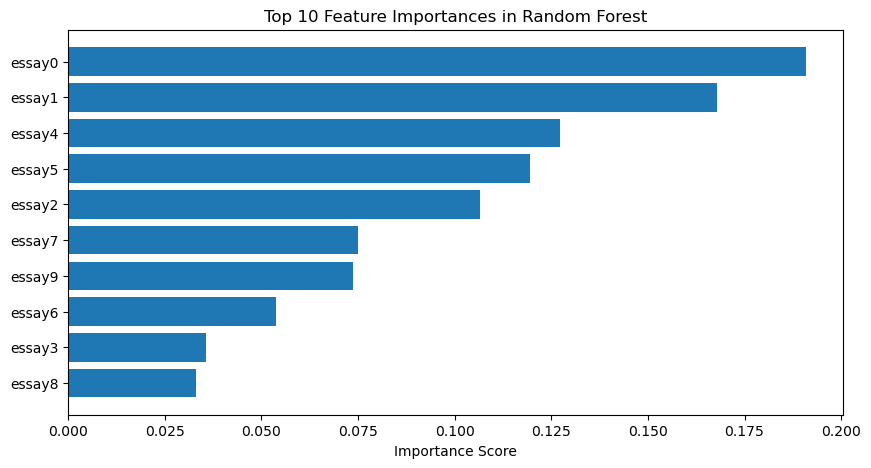

In [131]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.show()

In the following lines of code, I will now reduce the essay features, as it seems to be overinluencing the model.

In [133]:
# Ensure X_reduced contains only the rows used in training
X_reduced = X.loc[y_train.index].copy()  # ✅ Match rows to y_train

# Drop less useful essay features
X_reduced = X_reduced.drop(columns=['essay7', 'essay9', 'essay6', 'essay3', 'essay8'])

# Retrain the model
rf_model.fit(X_reduced, y_train)

print("✅ Model retrained with reduced essay features")

✅ Model retrained with reduced essay features


        Feature  Importance
8        essay0    0.269208
9        essay1    0.216709
12       essay5    0.170493
11       essay4    0.170426
10       essay2    0.124379
15  last_online    0.040246
23       speaks    0.006767
0           age    0.000242
13    ethnicity    0.000202
16     location    0.000183


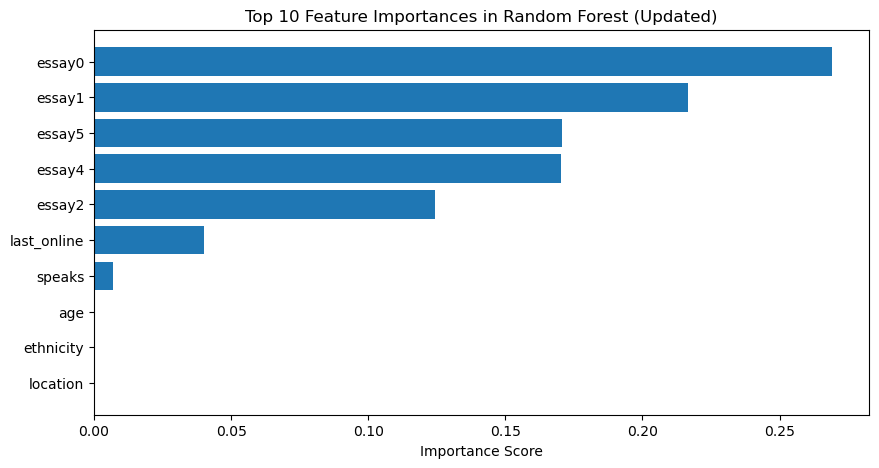

In [134]:
importances = rf_model.feature_importances_
feature_names = X_reduced.columns  # ✅ Use X_reduced instead of X

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest (Updated)")
plt.xlabel("Importance Score")
plt.show()

In [135]:
# Drop more essay features
X_reduced = X_reduced.drop(columns=['essay0', 'essay1', 'essay5', 'essay4', 'essay2'])

# Retrain the model
rf_model.fit(X_reduced, y_train)

print("✅ Model retrained with further reduced essay features")

✅ Model retrained with further reduced essay features


        Feature  Importance
10  last_online    0.713512
18       speaks    0.189053
0           age    0.010127
11     location    0.008576
8     ethnicity    0.008503
1        height    0.008266
15     religion    0.008179
9           job    0.006724
7     education    0.006363
14         pets    0.005895


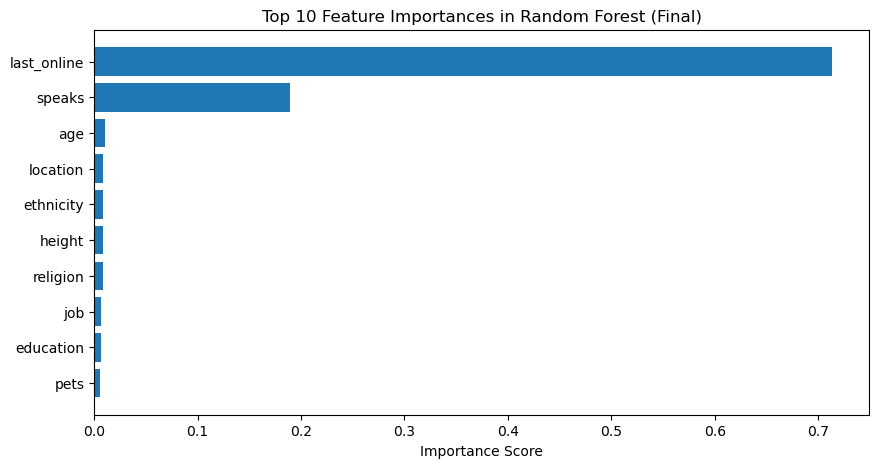

In [136]:
importances = rf_model.feature_importances_
feature_names = X_reduced.columns  # ✅ Use X_reduced instead of X

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest (Final)")
plt.xlabel("Importance Score")
plt.show()

In [137]:
# Remove 'last_online' from training data
X_reduced = X_reduced.drop(columns=['last_online'])

# Retrain the model
rf_model.fit(X_reduced, y_train)

print("✅ Model retrained without last_online")

✅ Model retrained without last_online


      Feature  Importance
17     speaks    0.608201
0         age    0.040260
10   location    0.034626
8   ethnicity    0.033882
1      height    0.033293
14   religion    0.030682
7   education    0.027724
9         job    0.027310
13       pets    0.023526
3   body_type    0.021137


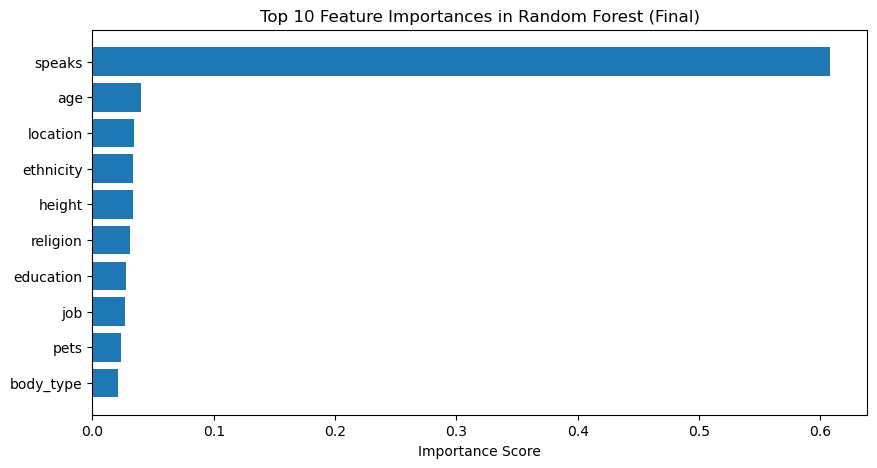

In [138]:
importances = rf_model.feature_importances_
feature_names = X_reduced.columns  # ✅ Use X_reduced instead of X

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest (Final)")
plt.xlabel("Importance Score")
plt.show()

In [139]:
# Remove 'speaks' from training data
X_reduced = X_reduced.drop(columns=['speaks'])

# Retrain the model
rf_model.fit(X_reduced, y_train)

print("✅ Model retrained without 'speaks'")

✅ Model retrained without 'speaks'


      Feature  Importance
0         age    0.095852
10   location    0.092581
8   ethnicity    0.087267
1      height    0.081229
14   religion    0.079515
7   education    0.069220
9         job    0.068172
3   body_type    0.059417
13       pets    0.059302
4        diet    0.051569


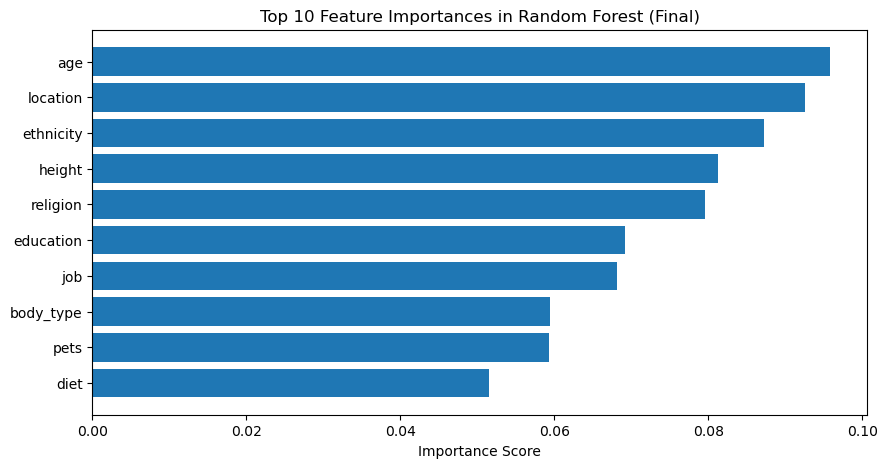

In [140]:
importances = rf_model.feature_importances_
feature_names = X_reduced.columns  # ✅ Use X_reduced instead of X

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest (Final)")
plt.xlabel("Importance Score")
plt.show()

In [141]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test[X_reduced.columns])  # ✅ Ensure feature consistency

# Evaluate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # Macro recall balances across classes
cm = confusion_matrix(y_test, y_pred)

print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"🛑 Confusion Matrix:\n{cm}")

🎯 Accuracy: 0.0921
🔄 Recall: 0.0918
🛑 Confusion Matrix:
[[ 88 141  58  58 127  59  17  22  34  60  79  43]
 [ 76 138  46  85 131  72  24  14  33  45  82  52]
 [ 93 134  59  84 111  84  15  26  35  86  62  52]
 [ 80 111  40  54 105  59  20  21  42  55  71  57]
 [ 80 134  61  71 135  80  14  35  52  61  93  46]
 [ 87 128  58  74 112  91  19  33  41  72  92  68]
 [ 98 118  66  86 121  68  22  21  41  64  88  48]
 [ 95 103  53  65 105  59  20  34  45  74  78  58]
 [ 92 116  48  71 120  54  19  29  46  63  77  53]
 [ 86 112  52  70 124  69  18  38  47  64  90  57]
 [ 78 122  57  78 105  62  21  23  46  72 101  63]
 [ 91 109  58  62 113  69  22  43  39  72  81  69]]


With reduced features, the model performs way worse at just over 9%, darnit!

In [143]:
# Ensure unknown data matches training features
X_unknown = X_unknown[X_reduced.columns]  # ✅ Fix feature mismatch

# Predict zodiac signs for users who didn't enter them
predicted_signs = rf_model.predict(X_unknown)

# Convert numeric predictions back to zodiac names
predicted_signs_labels = y_encoder.inverse_transform(predicted_signs)

# Store predictions in the original DataFrame
unknown_signs.loc[:, 'predicted_sign'] = predicted_signs_labels

# Display some predictions
print(unknown_signs[['predicted_sign']].head(10))

   predicted_sign
13          aries
28         gemini
31       aquarius
35          aries
39         cancer
40         cancer
46         cancer
48       aquarius
53        scorpio
54          aries


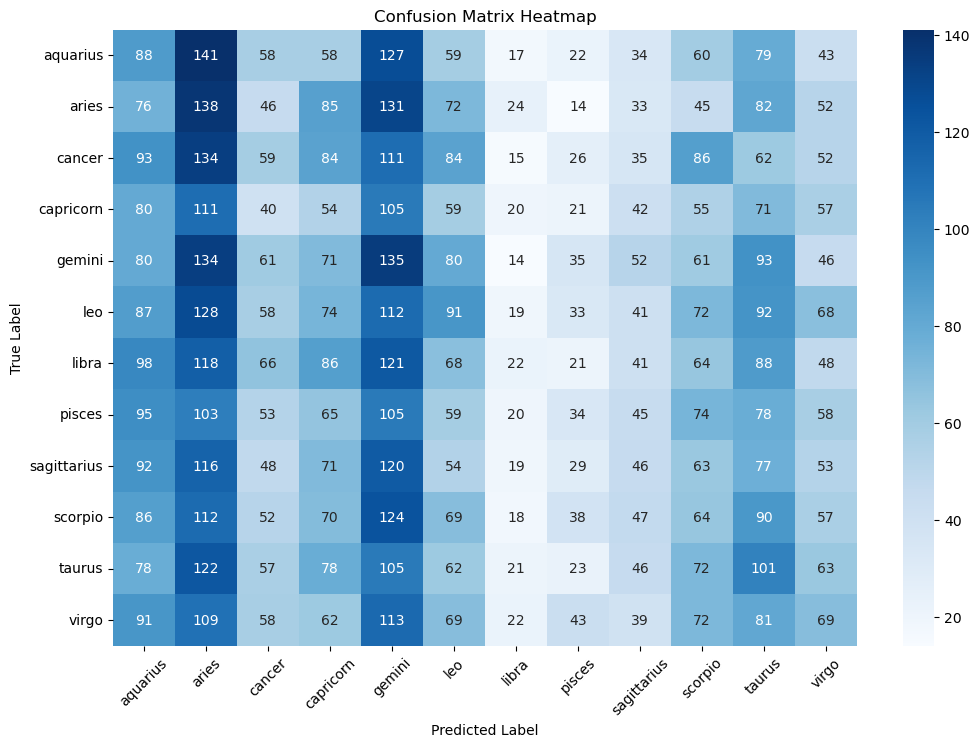

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

After evaluating all of our models, it seems that none of them perform very well.
An interesting thing is how much certain features can influence the performance of a model.  It's important to make sure these features are balanced in impoortance otherwise it will definitely skew the results.  I had expected to be able to predict missing zodiac signs, but we would likely need more info, like habits, and interests.  The essay questions definitely make it difficult to convert to numerical data.  Interestingly though, we were able to build a model that was slightly more accurate than just guessing at random.  So there is that!

Moving forward, I would need to further tune hyperparameters until I could get a model more accurate.  I could also use an algorithm to search for similarities in essay responses, seeing as the essay responses had such feature importance before removing them.